In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
# hyper parameters

input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [21]:
# load MNIST data

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


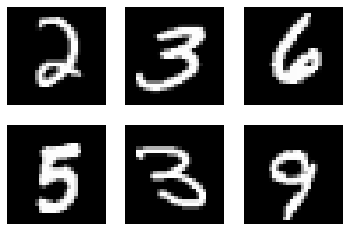

In [22]:
# example images

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.axis('off')
plt.show()

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [24]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [25]:
# loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
# training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # (100, 1, 28, 28) -> (100, 784)
        images = images.reshape(-1, 28*28)
        
        # forward pass
        outputs = model(images)
        
        # compute loss
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print progress
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')

epoch 1 / 2, step 100/600, loss = 0.3210
epoch 1 / 2, step 200/600, loss = 0.3804
epoch 1 / 2, step 300/600, loss = 0.3294
epoch 1 / 2, step 400/600, loss = 0.1819
epoch 1 / 2, step 500/600, loss = 0.2442
epoch 1 / 2, step 600/600, loss = 0.3304
epoch 2 / 2, step 100/600, loss = 0.1360
epoch 2 / 2, step 200/600, loss = 0.1790
epoch 2 / 2, step 300/600, loss = 0.2015
epoch 2 / 2, step 400/600, loss = 0.1740
epoch 2 / 2, step 500/600, loss = 0.3458
epoch 2 / 2, step 600/600, loss = 0.1789


In [31]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        
        # value, index
        _, pred = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (pred == labels).sum().item()
    
    acc = 100.0 * n_correct/ n_samples
    print(f'accuracy = {acc}')

accuracy = 95.15
